<a href="https://colab.research.google.com/github/Fabio180970/Challenge-Desafio2-Ciencia-de-Datos/blob/main/Challenge_Desafio2_Ciencia_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Extraccion**

In [1]:
import pandas as pd

In [2]:
datos_clientes = pd.read_json('TelecomX_Data.json')

In [3]:
datos_clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
datos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#**2. Transformacion de Datos**

In [5]:
columnas = list(datos_clientes.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [6]:
# 1. Copiamos el DataFrame original para no modificarlo directamente
df = datos_clientes.copy()

# 2. Expandimos cada columna anidada con pd.json_normalize
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# 3. Concatenamos todo con columnas planas
df_final = pd.concat(
    [df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1
)

# 4. Mostramos las primeras filas
print(df_final.head())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [7]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [8]:
print(df_final.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [9]:
print(f"El dataset tiene {df_final.shape[0]} filas y {df_final.shape[1]} columnas.")

El dataset tiene 7267 filas y 21 columnas.


In [10]:
# Listar columnas que son tipo object (texto, categóricas)
columnas_objeto = df_final.select_dtypes(include='object').columns.tolist()
print("Columnas categóricas:", columnas_objeto)

Columnas categóricas: ['customerID', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Total']


In [11]:
# 1. Columnas con tipo object
print("\n📌 Columnas tipo 'object' (posibles categóricas o mal tipadas):")
print(df_final.select_dtypes(include='object').columns.tolist())

# 2. Columnas con valores nulos
print("\n🚨 Columnas con valores nulos:")
print(df_final.isnull().sum()[df_final.isnull().sum() > 0])

# 3. Columnas únicas por valor (sin variabilidad)
print("\n⚠️ Columnas con un solo valor único:")
for col in df_final.columns:
    if df_final[col].nunique() == 1:
        print(f"{col} - único valor: {df_final[col].unique()[0]}")


📌 Columnas tipo 'object' (posibles categóricas o mal tipadas):
['customerID', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Total']

🚨 Columnas con valores nulos:
Series([], dtype: int64)

⚠️ Columnas con un solo valor único:


In [12]:
print(df_final.iloc[0:10])

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   
5  0013-MHZWF    No  Female              0      No        Yes       9   
6  0013-SMEOE    No  Female              1     Yes         No      71   
7  0014-BMAQU    No    Male              0     Yes         No      63   
8  0015-UOCOJ    No  Female              1      No         No       7   
9  0016-QLJIS    No  Female              0     Yes        Yes      65   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No  

In [13]:
df_final.drop(columns='customerID', inplace=True)

In [14]:
print(df_final.iloc[0:10])

  Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female              0     Yes        Yes       9          Yes   
1    No    Male              0      No         No       9          Yes   
2   Yes    Male              0      No         No       4          Yes   
3   Yes    Male              1     Yes         No      13          Yes   
4   Yes  Female              1     Yes         No       3          Yes   
5    No  Female              0      No        Yes       9          Yes   
6    No  Female              1     Yes         No      71          Yes   
7    No    Male              0     Yes         No      63          Yes   
8    No  Female              1      No         No       7          Yes   
9    No  Female              0     Yes        Yes      65          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes          

In [15]:
columnas_binarias = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling',
    'gender'

]

map_binario = {
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0
}

# Aplicar mapeo con verificación del tipo
for col in columnas_binarias:
    # Solo procesar columnas que existan
    if col in df_final.columns:
        # Si es texto, quitar espacios
        if df_final[col].dtype == 'object':
            df_final[col] = df_final[col].str.strip()
        # Aplicar mapeo binario
        df_final[col] = df_final[col].map(map_binario)

In [16]:
print(df_final[columnas_binarias].head())
print(df_final[columnas_binarias].dtypes)

   Churn  Partner  Dependents  PhoneService  PaperlessBilling  gender
0    0.0        1           1             1                 1       0
1    0.0        0           0             1                 0       1
2    1.0        0           0             1                 1       1
3    1.0        1           0             1                 1       1
4    1.0        1           0             1                 1       0
Churn               float64
Partner               int64
Dependents            int64
PhoneService          int64
PaperlessBilling      int64
gender                int64
dtype: object


In [17]:
print(df_final[columnas_binarias].head())

   Churn  Partner  Dependents  PhoneService  PaperlessBilling  gender
0    0.0        1           1             1                 1       0
1    0.0        0           0             1                 0       1
2    1.0        0           0             1                 1       1
3    1.0        1           0             1                 1       1
4    1.0        1           0             1                 1       0


In [18]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [19]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


In [20]:
print(df_final.isnull().sum().sort_values(ascending=False))


Churn               224
Charges.Total        11
SeniorCitizen         0
gender                0
Partner               0
Dependents            0
PhoneService          0
tenure                0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
MultipleLines         0
DeviceProtection      0
TechSupport           0
StreamingMovies       0
StreamingTV           0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
dtype: int64


In [21]:
df_final = df_final[df_final['Charges.Total'].notnull()]


In [22]:
print(df_final.isnull().sum().sort_values(ascending=False))


Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
dtype: int64


In [23]:
duplicados = df_final.duplicated().sum()

In [24]:
print(f"\n📌 Filas duplicadas: {duplicados}")


📌 Filas duplicadas: 22


In [25]:
duplicadas = df_final[df_final.duplicated(keep=False)]
print(duplicadas)

      Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
218     1.0       0              0        0           0       1             1   
295     1.0       0              0        0           0       1             1   
473     0.0       1              0        0           0       1             1   
624     1.0       1              0        0           0       1             1   
685     0.0       0              0        0           0       1             1   
701     1.0       1              0        0           0       1             1   
745     1.0       1              0        0           0       1             1   
881     1.0       1              0        0           0       1             1   
1341    1.0       1              0        0           0       1             1   
1357    1.0       1              0        0           0       1             1   
1841    1.0       0              0        0           0       1             1   
1851    1.0       0         

In [26]:
df_final = df_final.drop_duplicates()

In [27]:
print(f"Filas duplicadas después de limpieza: {df_final.duplicated().sum()}")

Filas duplicadas después de limpieza: 0


In [28]:
print(df_final.dtypes)

Churn               float64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


In [29]:
print(df_final.head())

   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0    0.0       0              0        1           1       9             1   
1    0.0       1              0        0           0       9             1   
2    1.0       1              0        0           0       4             1   
3    1.0       1              1        1           0      13             1   
4    1.0       0              1        1           0       3             1   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        C

In [30]:
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30

In [31]:
print(df_final[['Charges.Monthly', 'Cuentas_Diarias']].head())

   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


In [32]:
print(df_final.head())

   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0    0.0       0              0        1           1       9             1   
1    0.0       1              0        0           0       9             1   
2    1.0       1              0        0           0       4             1   
3    1.0       1              1        1           0      13             1   
4    1.0       0              1        1           0       3             1   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1           Yes             DSL             No  ...               No   
2            No     Fiber optic             No  ...              Yes   
3            No     Fiber optic             No  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes       

#**3. Carga y Analisis**

In [33]:
df_final.rename(columns={
    'Churn': 'Cancelación',
    'Partner': 'Tiene_Pareja',
    'Dependents': 'Tiene_Dependientes',
    'PhoneService': 'Servicio_Teléfono',
    'PaperlessBilling': 'Facturación_Electrónica',
    'gender': 'Genero',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales',
    'tenure': 'Meses_Conectado',
    'Cuentas_Diarias': 'Cargos_Diarios'
}, inplace=True)

In [34]:
df_final['Genero'] = df_final['Genero'].map({'Male': 'Hombre', 'Female': 'Mujer'})


In [35]:
df_final.rename(columns={
    'InternetService_Fiber optic': 'Internet_Fibra',
    'InternetService_No': 'Sin_Internet',
    'Contract_Two year': 'Contrato_2_Años',
    'Contract_One year': 'Contrato_1_Año'

}, inplace=True)

In [36]:
print(df_final.columns)

Index(['Cancelación', 'Genero', 'SeniorCitizen', 'Tiene_Pareja',
       'Tiene_Dependientes', 'Meses_Conectado', 'Servicio_Teléfono',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'Facturación_Electrónica', 'PaymentMethod',
       'Cargos_Mensuales', 'Cargos_Totales', 'Cargos_Diarios'],
      dtype='object')


In [37]:
print(df_final.dtypes)

Cancelación                float64
Genero                      object
SeniorCitizen                int64
Tiene_Pareja                 int64
Tiene_Dependientes           int64
Meses_Conectado              int64
Servicio_Teléfono            int64
MultipleLines               object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
Contract                    object
Facturación_Electrónica      int64
PaymentMethod               object
Cargos_Mensuales           float64
Cargos_Totales             float64
Cargos_Diarios             float64
dtype: object


In [38]:
# Estadísticas básicas para columnas numéricas

descripcion_numerica = df_final.describe().T  # transpuesta para mejor lectura
descripcion_numerica['mediana'] = df_final.median(numeric_only=True)
descripcion_numerica['moda'] = df_final.mode(numeric_only=True).iloc[0]
descripcion_numerica['rango'] = descripcion_numerica['max'] - descripcion_numerica['min']
print(descripcion_numerica[['count', 'mean', 'mediana', 'moda', 'std', 'min', 'max', 'rango']])

                          count         mean   mediana       moda  \
Cancelación              7010.0     0.264907     0.000   0.000000   
SeniorCitizen            7234.0     0.163257     0.000   0.000000   
Tiene_Pareja             7234.0     0.485071     0.000   0.000000   
Tiene_Dependientes       7234.0     0.299972     0.000   0.000000   
Meses_Conectado          7234.0    32.491015    29.000   1.000000   
Servicio_Teléfono        7234.0     0.902544     1.000   1.000000   
Facturación_Electrónica  7234.0     0.594139     1.000   1.000000   
Cargos_Mensuales         7234.0    64.842950    70.350  20.050000   
Cargos_Totales           7234.0  2287.460658  1397.475  19.750000   
Cargos_Diarios           7234.0     2.161432     2.345   0.668333   

                                 std        min          max    rango  
Cancelación                 0.441315   0.000000     1.000000     1.00  
SeniorCitizen               0.369625   0.000000     1.000000     1.00  
Tiene_Pareja            

In [39]:
# Detectar columnas categóricas (tipo object o categoría)
categoricas = df_final.select_dtypes(include=['object', 'category']).columns

# Mostrar conteo de frecuencia por cada columna categórica
for col in categoricas:
    print(f"\n📊 Frecuencia en '{col}':")
    print(df_final[col].value_counts())


📊 Frecuencia en 'Genero':
Series([], Name: count, dtype: int64)

📊 Frecuencia en 'MultipleLines':
MultipleLines
No                  3468
Yes                 3061
No phone service     705
Name: count, dtype: int64

📊 Frecuencia en 'InternetService':
InternetService
Fiber optic    3192
DSL            2481
No             1561
Name: count, dtype: int64

📊 Frecuencia en 'OnlineSecurity':
OnlineSecurity
No                     3599
Yes                    2074
No internet service    1561
Name: count, dtype: int64

📊 Frecuencia en 'OnlineBackup':
OnlineBackup
No                     3173
Yes                    2500
No internet service    1561
Name: count, dtype: int64

📊 Frecuencia en 'DeviceProtection':
DeviceProtection
No                     3186
Yes                    2487
No internet service    1561
Name: count, dtype: int64

📊 Frecuencia en 'TechSupport':
TechSupport
No                     3573
Yes                    2100
No internet service    1561
Name: count, dtype: int64

📊 Frecuencia 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


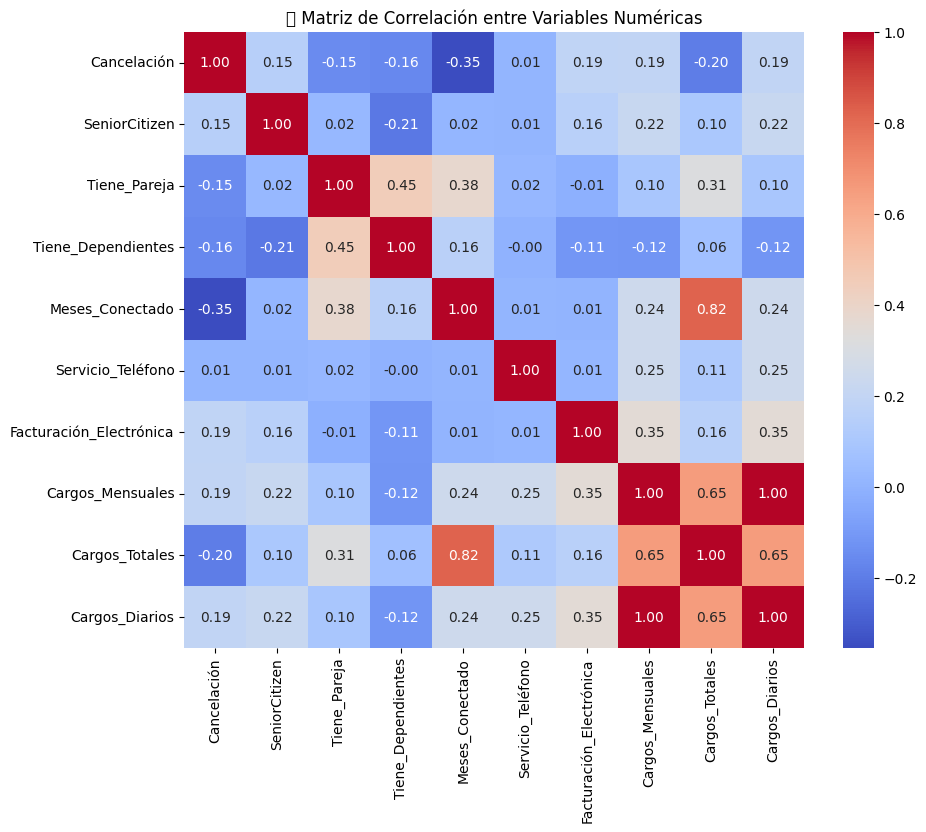

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_final.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔍 Matriz de Correlación entre Variables Numéricas")
plt.show()


In [41]:
# Esto evita errores al usar .agg en columnas no numéricas
df_final.select_dtypes(exclude='object').groupby(df_final['Cancelación']).agg(['mean', 'median', 'std'])

Cancelación             SeniorCitizen                   \
                   mean median  std          mean median       std   
Cancelación                                                          
0.0                 0.0    0.0  0.0      0.129245    0.0  0.335504   
1.0                 1.0    1.0  0.0      0.255789    0.0  0.436421   

            Tiene_Pareja                  Tiene_Dependientes  ...  \
                    mean median       std               mean  ...   
Cancelación                                                   ...   
0.0             0.528624    1.0  0.499228           0.344071  ...   
1.0             0.360258    0.0  0.480205           0.175552  ...   

            Facturación_Electrónica Cargos_Mensuales                    \
                                std             mean median        std   
Cancelación                                                              
0.0                        0.498680        61.387415  64.55  31.071570   
1.0                        0.433672        74.604308  79.70  24.597504   

            Cargos_Totales                      Cargos_Diarios            \
                      mean  median          std           mean    median   
Cancelación                                                                
0.0            2560.264118  1688.9  2329.034632       2.046247  2.151667   
1.0            1541.376548   713.1  1893.151020       2.486810  2.656667   

                       
                  std  
Cancelación            
0.0          1.035719  
1.0          0.819917  

[2 rows x 30 columns]

/tmp/ipython-input-42-3020642816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cancelación', data=df_final, palette='Set2')


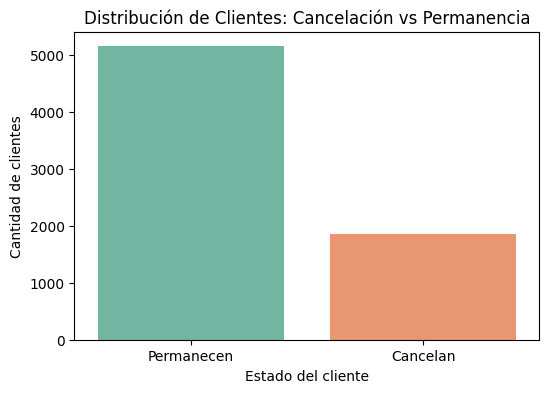

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Cancelación', data=df_final, palette='Set2')
plt.title('Distribución de Clientes: Cancelación vs Permanencia')
plt.xticks([0, 1], ['Permanecen', 'Cancelan'])
plt.xlabel('Estado del cliente')
plt.ylabel('Cantidad de clientes')
plt.show()


In [43]:
variables_relevantes = [
    'Contract',
    'tenure',
    'InternetService',
    'PaymentMethod',
    'Charges.Monthly',  # asegúrate del nombre real
    'TechSupport',
    'OnlineSecurity'
]

In [44]:
for var in variables_relevantes:
    if var in df_final.columns:
        print(f"\n📊 Tasa de cancelación según: {var}")
        tasa = df_final.groupby(var)['Cancelación'].mean().sort_values(ascending=False)
        print(tasa)


📊 Tasa de cancelación según: Contract
Contract
Month-to-month    0.426421
One year          0.112772
Two year          0.028487
Name: Cancelación, dtype: float64

📊 Tasa de cancelación según: InternetService
InternetService
Fiber optic    0.417799
DSL            0.189312
No             0.072377
Name: Cancelación, dtype: float64

📊 Tasa de cancelación según: PaymentMethod
PaymentMethod
Electronic check             0.451462
Mailed check                 0.190176
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
Name: Cancelación, dtype: float64

📊 Tasa de cancelación según: TechSupport
TechSupport
No                     0.415127
Yes                    0.151961
No internet service    0.072377
Name: Cancelación, dtype: float64

📊 Tasa de cancelación según: OnlineSecurity
OnlineSecurity
No                     0.416452
Yes                    0.146402
No internet service    0.072377
Name: Cancelación, dtype: float64


In [45]:
import plotly.express as px

# Lista de variables categóricas a analizar
variables_categoricas = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity']

# Crear gráficos interactivos uno por uno
for var in variables_categoricas:
    if var in df_final.columns:
        fig = px.bar(
            df_final.groupby(var)['Cancelación'].mean().reset_index(),
            x=var,
            y='Cancelación',
            title=f'Tasa de Cancelación por {var}',
            labels={'Cancelación': 'Proporción de Cancelación'},
            color='Cancelación',
            color_continuous_scale='RdPu',
            text_auto='.2f'  # Mostrar valores en las barras
        )

        fig.update_layout(
            yaxis_tickformat=".0%",  # Formato de porcentaje si deseas
            xaxis_title=var,
            yaxis_title='Tasa de Cancelación',
            title_font_size=18,
            template='plotly_white',
            bargap=0.4
        )

        fig.show()

In [46]:
import plotly.express as px

# Variables numéricas clave
variables_numericas = ['Cargos_Totales', 'Meses_Conectado', 'Cargos_Mensuales']  # ajusta nombres según tu DF

for var in variables_numericas:
    if var in df_final.columns:
        # Histograma con separación por cancelación
        fig_hist = px.histogram(
            df_final,
            x=var,
            color='Cancelación',
            barmode='overlay',
            marginal='box',
            nbins=50,
            title=f'Distribución de {var} según Cancelación',
            labels={'Cancelación': '¿Canceló?', var: var.replace('_', ' ')}
        )
        fig_hist.update_layout(template='plotly_white')
        fig_hist.show()

        # Boxplot comparativo
        fig_box = px.box(
            df_final,
            x='Cancelación',
            y=var,
            points='all',
            color='Cancelación',
            title=f'{var} por Estado de Cancelación',
            labels={'Cancelación': '¿Canceló?', var: var.replace('_', ' ')}
        )
        fig_box.update_layout(template='plotly_white')
        fig_box.show()

#**4. Informe Final**

##📋 Informe Final
###    Análisis de Evasión de Clientes – Alura Telecom

###🎯 Objetivo del Análisis:
El propósito de este proyecto fue identificar patrones y factores asociados a la cancelación del servicio por parte de los clientes, utilizando un enfoque exploratorio y visual apoyado en técnicas de análisis de datos con Python, Pandas, Seaborn y Plotly.

El objetivo principal de este análisis fue identificar los factores más relevantes que explican la evasión de clientes en una empresa de telecomunicaciones. A partir de datos reales de comportamiento y facturación.

###🗂️ 2. Extracción y estructuración de datos
####**✅ Extraccion del archivo**
De acuerdo a la informacion suministrada por el cliente se utilizó un archivo en formato .json, que contenía (7.267)datos información anidada sobre cada cliente, organizada en (6) columnas:

- Cancelacion (Churn)
- Información personal (customer)
- Datos telefónicos (phone)
- Datos de internet (internet)
- Información de facturación (account)

####**✅ Proceso de transformación**
1. Inicialmente con los datos suministrados se crea un DataFrame de Pandas Datos_clientes() para facilitar su manipulación y exploracion.

2. Se utiliza pandas.json_normalize() con el fin de desanidar los campos y convertirlos en un DataFrame plano.

3. Una vez desanidada la informacion se procede a revisarla y evaluar con type() con el fin de detectar posibles categorias mal tipadas, columnas con valores nulos y columnas con valores unicos.

4. Se eliminaron (22) filas duplicadas y se elimino la columna (Customer ID) ya que esta columna no afectaba el analisis.



##🧹 3. Limpieza y transformación de datos
###**✔️ Conversión de variables:**

1. Se mapearon columnas categóricas binarias (Yes/No, Male/Female) a valores binarios (1 y 0).

2. Se aplicó get_dummies() para variables con múltiples categorías (como InternetService, PaymentMethod, etc.).

3. Se renombraron algunas columnas a nombres más comprensibles en español (ej. tenure → Meses_Conectado, Charges.Monthly → Cargos_Mensuales).

4. Se creó una nueva columna: Cargos_Diarios, calculada a partir de los cargos mensuales (Cargos_Mensuales / 30), para tener una visión más granular del gasto diario por cliente.

##📊 4. Análisis exploratorio de cancelación (Churn)

###**📌 Analisis Descriptivo Calculando Metricas**

- Se realiza, un análisis descriptivo de los datos, calculando métricas como **media, mediana, desviación estándar** y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

✅ 1. Cancelación (Churn)
Media = 0.2649, lo que indica que el 26.5% de los clientes han cancelado. Moda = 0, es decir, la mayoría no canceló.

📌 Conclusión: Aunque la mayoría de clientes permanece, más de 1 de cada 4 se va, lo que es significativo y requiere acciones de retención.

✅ 2. Meses_Conectado (Tenure)
Media = 32.49 meses, mediana = 29, máximo = 72. Moda = 1: muchos clientes llevan muy poco tiempo. Rango = 71 meses (gran dispersión).

📌 Conclusión: Hay una alta variabilidad en la antigüedad de los clientes. Muchos clientes se van en los primeros meses (confirmado por la moda en 1), lo que sugiere que el onboarding y la experiencia inicial son críticos para la retención.

✅ 3. Cargos_Mensuales (Monthly Charges)
Media = 64.84, mediana = 70.35, pero la moda = 20.05. Máximo = 118.75, lo que sugiere servicios premium. Alta desviación estándar = 30.1, lo que indica variabilidad fuerte.

📌 Conclusión: Aunque muchos clientes pagan montos altos, existe un grupo grande que paga poco (20.05). Los clientes que pagan más podrían ser más exigentes y más propensos a cancelar si no se cumple su expectativa.

✅ 4. Cargos_Totales (Total Charges)
Media = 2.287 USD, pero la mediana = 1.397 USD y la moda = 19.75 USD (muy baja). Desviación estándar = 2268, máximo = 8684.

Clientes con bajo gasto total → podrían ser los que se dan de baja rápido.

📌 Conclusión: Clientes con bajo gasto total tienden a cancelar antes. El valor de vida del cliente (CLTV) es bajo en un grupo importante, lo que representa una oportunidad para trabajar retención desde el primer mes.

###**📌 Calculo de Frecuencia de Categorias Nuemericas**

- 📊 Frecuencia en 'OnlineSecurity':
OnlineSecurity
No                     3599
Yes                    2074
No internet service    1561
Name: count, dtype: int64

- 📊 Frecuencia en 'OnlineBackup':
OnlineBackup
No                     3173
Yes                    2500
No internet service    1561
Name: count, dtype: int64

- 📊 Frecuencia en 'DeviceProtection':
DeviceProtection
No                     3186
Yes                    2487
No internet service    1561
Name: count, dtype: int64

- 📊 Frecuencia en 'TechSupport':
TechSupport
No                     3573
Yes                    2100
No internet service    1561
Name: count, dtype: int64

- 📊 Frecuencia en 'StreamingTV':
StreamingTV
No                     2887
Yes                    2786
No internet service    1561
Name: count, dtype: int64

- 📊 Frecuencia en 'StreamingMovies':
StreamingMovies
No                     2858
Yes                    2815
No internet service    1561
Name: count, dtype: int64

- 📊 Frecuencia en 'Contract':
Contract
Month-to-month    3983
Two year          1733
One year          1518
Name: count, dtype: int64

- 📊 Frecuencia en 'PaymentMethod':
PaymentMethod
Electronic check             2439
Mailed check                 1641
Bank transfer (automatic)    1587
Credit card (automatic)      1567
Name: count, dtype: int64

###**📌 Matriz de Correlacion Entre Variables Numericas**

Se graficó una matriz de correlacion entre variables numericas que indica el comportamiento general.

###**📌 Distribución general de cancelación**
Se identificó que aproximadamente el 26.6% de los clientes cancelaron el servicio.

Esto se visualizó con gráficos de barras y circulares (Seaborn y Plotly), mostrando un equilibrio visual entre evasión y permanencia.

##📈 5. Variables categóricas relacionadas con la evasión
Se evaluó la tasa de cancelación promedio por categoría, y se identificaron los factores más influyentes:

###**Variable	Categoría con mayor tasa de cancelación**

**Tasa de cancelación**

1. Contract	Month-to-month	42.6%
2. InternetService	Fiber optic	41.8%
3. PaymentMethod	Electronic check	45.1%
4. TechSupport	No	41.5%
5. OnlineSecurity	No	41.6%

###**🎯 Interpretación clave:**

- Contratos mensuales y servicios costosos sin soporte o seguridad online aumentan la probabilidad de evasión.
- Los métodos de pago automáticos (como tarjeta de crédito) están asociados a menor evasión.

##📊 6. Variables numéricas vs cancelación
**Variables analizadas:**

- Meses_Conectado
- Cargos_Mensuales
- Cargos_Totales

**Hallazgos:**

1. Clientes que cancelan tienen significativamente menos tiempo con la empresa.
2. Los que cancelan también han gastado menos en total, indicando falta de fidelización.
3. Algunos que pagan más por mes tienen una mayor tasa de cancelación, lo que podría sugerir insatisfacción con el valor percibido.
4. Gráficos interactivos (Plotly) con histogramas y boxplots ayudaron a visualizar claramente estas diferencias.

##📌 7. Conclusiones y recomendaciones
###**🧠 Insights principales:**
1. La flexibilidad del contrato mensual aumenta la probabilidad de cancelación.
2. Falta de soporte técnico o seguridad online está altamente correlacionada con la evasión.
3. Clientes nuevos y con menor gasto acumulado tienen más probabilidad de cancelar.
4. El método de pago electrónico manual (cheque) es el más riesgoso en términos de permanencia.

###**✅ Recomendaciones estratégicas:**

1. Incentivar contratos anuales: descuentos o beneficios para contratos más largos.
2. Agregar servicios de valor (seguridad, soporte) sin costo a clientes en riesgo.
3. Migrar clientes a métodos de pago automáticos.
4. Diseñar campañas de retención para nuevos clientes en los primeros 3 meses.



##**Principales Causas de Cancelacion de Clientes**

Estas causas son basadas en la interaccion del trabajo realizado:

1. 🗓️ Tipo de contrato mensual (Month-to-month)
Tasa de cancelación: 42.6%.  Es el doble o más alta que la de contratos de un año (11.2%) o dos años (2.8%).

📌 Por qué importa:
- La falta de compromiso a largo plazo facilita la salida.
- Clientes en este modelo tienen menos barreras para cancelar en cualquier momento.

2. 📉 Tiempo de conexión bajo (tenure). La moda de Meses_Conectado es 1 mes → muchos cancelan en el primer mes.

- Clientes nuevos son altamente volátiles.

📌 Interpretación:
- Hay problemas con la experiencia inicial del cliente.
- El servicio no logra fidelizar rápidamente.

3. ❌ Ausencia de servicios complementarios.
- Sin soporte técnico: la Cancelacion sera del 41.5%
- Sin seguridad online: la Cancelacion sera del 41.6%

📌 Por qué importa:
- Clientes sin valor agregado no perciben diferenciación.
- Esto genera falta de lealtad y más cancelaciones ante cualquier problema.

4. 💳 Método de pago (cheque electrónico)
- Clientes que pagan manualmente tienen una de las tasas más altas de cancelación (45.1%).
- Refleja perfiles menos digitalizados o con menor compromiso financiero.

🎯 **Conclusión general**
La principal causa de cancelación de clientes es una combinación de baja fidelización temprana, contratos altamente flexibles, y falta de servicios de valor añadido.

🧠 **Recomendación**
👉 Para reducir la cancelación, la empresa debe:
- Incentivar contratos de mayor duración con beneficios tangibles.
- Mejorar la experiencia del cliente en los primeros 2 meses.
- Incluir soporte técnico y seguridad como parte de los planes básicos.
- Fomentar métodos de pago automáticos y evitar el cheque manual.